In [1]:
import matplotlib.pyplot as plt

from superfv import AdvectionSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis

import numpy as np

In [2]:
sim = AdvectionSolver(
    ic=lambda idx, x, y, z: ic.square(idx, x, y, z, vx=2, vy=1),
    nx=32,
    ny=32,
    p=3,
    interpolation_scheme="gauss-legendre",
)
sim.run(1.0)

  7%|▋         | 0.06666666666666667/1.0 [00:00] 

Generating conservative interpolation stencil for p=3, x=0 with size  5
Generating conservative interpolation stencil for p=3, x=-1 with size  5
Generating conservative interpolation stencil for p=3, x=1 with size  5
Generating conservative interpolation stencil for p=3, x=-0.5773502691896257 with size  5
Generating conservative interpolation stencil for p=3, x=0.5773502691896257 with size  5


100%|██████████| 1.0/1.0 [00:02]                


In [3]:
np.min(sim.minisnapshots["min_rho"]), np.max(sim.minisnapshots["max_rho"])

(np.float64(-0.165836005020905), np.float64(1.3013089940216263))

/Users/jonathan/Desktop/superfv/superfv/visualization.py:32: UserWarning: Coordinate 0.5 not found in array. Using nearest: 0.484375.
  warnings.warn(
/Users/jonathan/Desktop/superfv/superfv/visualization.py:32: UserWarning: Coordinate 0.5 not found in array. Using nearest: 0.484375.
  warnings.warn(


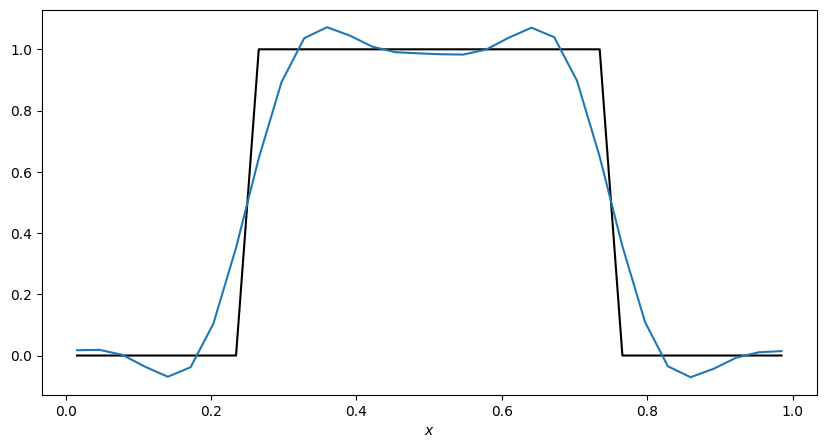

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, x=None, t=0, color="k")
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, x=None, xlabel=True)

In [5]:
sim.timer.print_report()

Category                                    Calls      Cumulative Time
------------------------------------------------------------------------
!ExplicitODESolver.integrate.body               1                 2.36
!FiniteVolumeSolver.run                         1                 2.41
AdvectionSolver.advection_upwind              968                 0.19
AdvectionSolver.compute_dt                    121                 0.02
AdvectionSolver.minisnapshot                  243                 0.01
ExplicitODESolver.integrate                     1                 2.41
ExplicitODESolver.minisnapshot                243                 0.00
ExplicitODESolver.take_step                   121                 2.25
FiniteVolumeSolver.f                          484                 2.22
FiniteVolumeSolver.minisnapshot               243                 0.00
FiniteVolumeSolver.snapshot                     2                 0.02

